# Importing Libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Data Preprocessing

In [3]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')

In [5]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

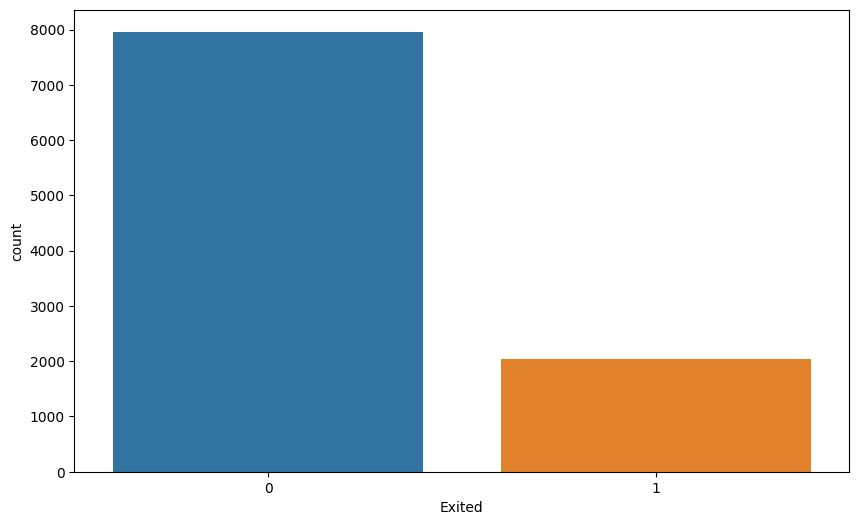

In [12]:
plt.figure(figsize= (10,6))
sns.countplot(data=data, x = 'Exited')

In [14]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Balancing dataset

In [16]:
exists = data[data['Exited'] == 1]
not_exists = data[data['Exited'] == 0]

In [18]:
not_exists.shape

(7963, 14)

In [19]:
exists.shape

(2037, 14)

In [23]:
sample = not_exists.sample(n = 2037)
sample.shape

(2037, 14)

In [62]:
new_data = pd.concat([sample,exists], axis = 0)
new_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1173,1174,15808182,Beneventi,478,Spain,Female,36,3,92363.30,2,1,0,44912.70,0
5663,5664,15765287,Grant,850,France,Female,38,2,0.00,2,1,0,9015.07,0
9202,9203,15735782,MacDonald,528,France,Male,31,9,120962.59,1,1,0,5419.31,0
225,226,15699029,Bagley,670,France,Male,37,4,170557.91,2,1,0,198252.88,0
3908,3909,15599004,Tsao,655,Spain,Male,37,1,0.00,1,1,1,106040.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [63]:
new_data.Exited.value_counts()

0    2037
1    2037
Name: Exited, dtype: int64

In [64]:
new_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,4074.000000,4.074000e+03,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000
mean,4910.821306,1.569066e+07,649.648748,41.249141,4.949926,81757.301043,1.506627,0.701522,0.459254,99674.920692,0.500000
std,2866.272787,7.199792e+04,96.948700,10.690891,2.895758,61390.611897,0.670724,0.457647,0.498398,57930.337382,0.500061
min,1.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2443.250000,1.562828e+07,584.000000,34.000000,2.000000,0.000000,1.000000,0.000000,0.000000,49792.467500,0.000000
50%,4883.500000,1.569001e+07,651.000000,40.000000,5.000000,102987.240000,1.000000,1.000000,0.000000,98905.005000,0.500000
75%,7396.750000,1.575233e+07,718.000000,48.000000,7.000000,129098.900000,2.000000,1.000000,1.000000,149495.437500,1.000000
max,9999.000000,1.581566e+07,850.000000,88.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199909.320000,1.000000


<Axes: xlabel='Exited', ylabel='count'>

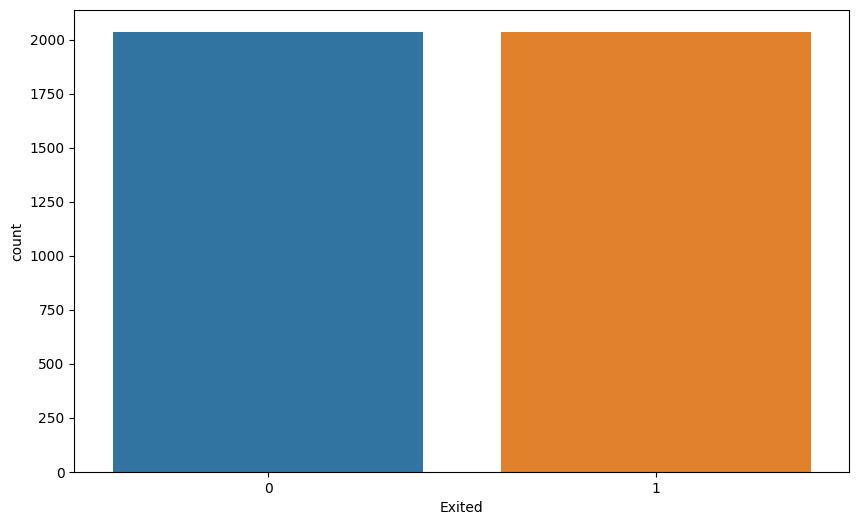

In [65]:
plt.figure(figsize= (10,6))
sns.countplot(data=new_data, x = 'Exited')

In [66]:
new_data.drop(['RowNumber', 'CustomerId', 'Surname','Gender'],axis=1,inplace=True)

In [67]:
new_data.columns

Index(['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [68]:
geography_labels = {'France':0, 'Germany':1, 'Spain':2}
new_data.Geography = new_data.Geography.map(geography_labels)
new_data

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1173,478,2,36,3,92363.30,2,1,0,44912.70,0
5663,850,0,38,2,0.00,2,1,0,9015.07,0
9202,528,0,31,9,120962.59,1,1,0,5419.31,0
225,670,0,37,4,170557.91,2,1,0,198252.88,0
3908,655,2,37,1,0.00,1,1,1,106040.97,0
...,...,...,...,...,...,...,...,...,...,...
9981,498,1,42,3,152039.70,1,1,1,53445.17,1
9982,655,1,46,7,137145.12,1,1,0,115146.40,1
9991,597,0,53,4,88381.21,1,1,0,69384.71,1
9997,709,0,36,7,0.00,1,0,1,42085.58,1


<Axes: >

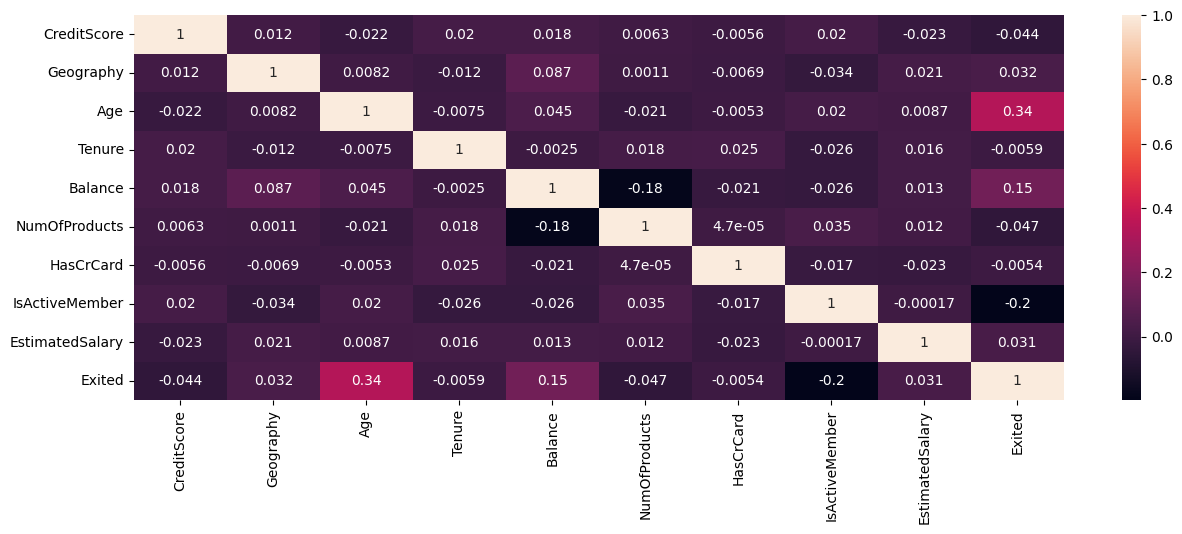

In [69]:
plt.figure(figsize=(15,5))
sns.heatmap(new_data.corr(),annot=True)

# Splitting Data

In [70]:
X = new_data.drop(['Exited'], axis=1)
y = new_data['Exited']

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,stratify = y, random_state = 0)

In [72]:
print(X_train.shape)
print(X_test.shape)

(3259, 9)
(815, 9)


In [73]:
X_train

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9396,700,2,40,2,0.00,2,1,0,199753.97
3514,643,2,32,2,0.00,1,0,0,131301.74
8768,761,1,62,5,98854.34,1,0,0,86920.97
6131,686,0,60,9,0.00,3,1,1,75246.21
4343,549,1,54,5,92877.33,1,1,0,2619.64
...,...,...,...,...,...,...,...,...,...
9310,651,2,47,2,0.00,2,1,1,119808.64
191,512,0,36,3,84327.77,2,1,0,17675.36
2843,666,1,38,6,99812.88,2,1,1,158357.97
2913,787,0,40,6,0.00,2,1,1,84151.98


In [74]:
print(y_train.shape)
print(y_test.shape)

(3259,)
(815,)


In [75]:
y_train

9396    0
3514    0
8768    1
6131    1
4343    1
       ..
9310    0
191     0
2843    0
2913    0
4066    0
Name: Exited, Length: 3259, dtype: int64

In [77]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building Models and Training

## Logistic Regression

In [89]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [90]:
y_pred = lr.predict(X_test)

In [91]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[264 144]
 [121 286]]


In [92]:
lr_acc = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic regression = ", lr_acc)

Accuracy of Logistic regression =  0.6748466257668712


## LogisticRegressionCV

In [97]:
lr_CV = LogisticRegressionCV(solver='liblinear',penalty='l1',cv=3,Cs=10)
lr_CV.fit(X_train,y_train)

LogisticRegressionCV(cv=3, penalty='l1', solver='liblinear')

In [101]:
y_pred = lr_CV.predict(X_test)

In [102]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[284 124]
 [123 284]]


In [103]:
lr_acc = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic regression = ", lr_acc)

Accuracy of Logistic regression =  0.6969325153374233


## DecisionTreeClassifier

In [111]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [112]:
y_pred = dtc.predict(X_test)

In [113]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[271 137]
 [116 291]]


In [114]:
dtc_acc = accuracy_score(y_test, y_pred)
print("Accuracy of DecisionTree Classifier = ", dtc_acc)

Accuracy of DecisionTree Classifier =  0.6895705521472393


## Random Forest classifier

In [123]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [124]:
y_pred = rfc.predict(X_test)

In [125]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[323  85]
 [114 293]]


In [126]:
rfc_acc = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest classifier = ", rfc_acc)

Accuracy of Random Forest classifier =  0.7558282208588957


## K nearest neighbours

In [139]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [140]:
y_pred = knn.predict(X_test)

In [141]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[302 106]
 [117 290]]


In [142]:
knn_acc = accuracy_score(y_test, y_pred)
print("Accuracy of K nearest neighbours = ", knn_acc)

Accuracy of K nearest neighbours =  0.7263803680981595


## Naive Bayes

In [165]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [166]:
y_pred = lr_CV.predict(X_test)

In [167]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[284 124]
 [123 284]]


In [168]:
nb_acc = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bayes = ", nb_acc)

Accuracy of Naive Bayes =  0.6969325153374233


## SVC

In [160]:
sv = SVC(kernel = 'rbf', random_state = 0)
sv.fit(X_train,y_train)

SVC(random_state=0)

In [161]:
y_pred = sv.predict(X_test)

In [162]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[313  95]
 [ 90 317]]


In [164]:
sv_acc = accuracy_score(y_test, y_pred)
print("Accuracy of SVC = ", sv_acc)

Accuracy of SVC =  0.7730061349693251


# Conclusion

At the end we got to know that the Support Vector Classification gain the best accuracy(77.3%) on this dataset